<a href="https://colab.research.google.com/github/smlra-kjsce/ML-101/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Real Estate - Housing prices Example



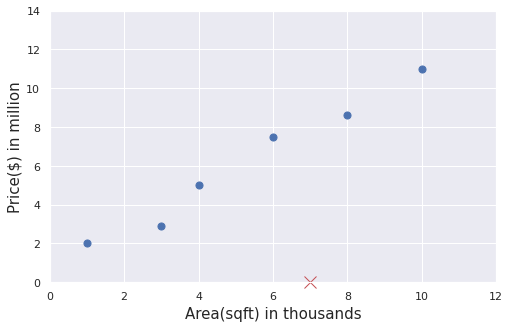

In [ ]:
plt.figure(figsize = (8,5))

x = np.array([1, 3, 4, 6, 8, 10])
y = np.array([2, 2.9, 5, 7.5, 8.6, 11])
plt.axis([0, 12, 0, 14])
plt.scatter(x, y, s = 50)
plt.xlabel('Area(sqft) in thousands', fontsize=15)
plt.ylabel('Price($) in million', fontsize=15)

L = np.array(np.arange(12))
plt.plot(7,0,'rx', markersize=12)[0].set_clip_on(False)
#plt.plot(L, L + 1, 'r')
#plt.plot(L, 0.7*L + 0.5, 'y')
plt.show()

Theory --> Modelling --> Algorithm --> Application

## Mathematical Modelling

- #### $ n $ => No. of training examples
#### Where a single training example is of the form $ (x_i, y_i) $
- #### $ x $ => Input feature(s)
- #### $ y $ => Output/Target variable
<br/>

#### $ (x_i,y_i) $ ---> Algorithm ---> function ($y'$)

In the above case it will give us a linear function of the form $$  y' = mx + c $$



### Cost Function $ (J) $

Choose $m$ and $c$ in such a way that $y'$ is close to $y$ for each of our training examples.

$$ J = \frac{1}{2n} \cdot \sum_{i = 1}^{n} (y' - y)^2$$

### Derivatives - 

- ### $ \frac{\partial J}{\partial c} = \frac{1}{n} \cdot \sum_{i = 1}^{n} (y'_i - y_i)$

- ### $ \frac{\partial J}{\partial m} = \frac{1}{n} \cdot \sum_{i = 1}^{n} (y'_i - y_i)\cdot x_i$

These are the derivatives you will need to compute while performing gradient descent. 


## Gradient Descent Algorithm -

#### Repeat until Convergence {
#### $ m = m - \alpha \frac{\partial J}{\partial m} $

#### $ c = c - \alpha \frac{\partial J}{\partial c} $ <br>
}

#### $ \alpha $ => learning rate
<br/>

#### For simplicity let's assume c = 0, so we get

#### $ y' = mx $

#### $ J = \frac{1}{2n} \cdot \sum_{i = 1}^{n} (mx - y)^2 $

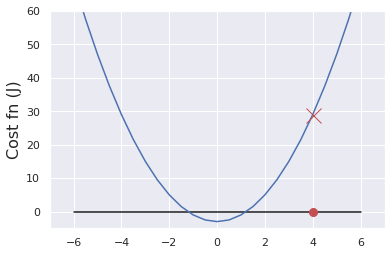

In [ ]:
x = np.arange(-6,6.5, 0.5)

plt.plot(x, np.zeros_like(x), 'k')
plt.plot(x, 2*x**2 - 3)
plt.axis([-7,7,-5,60]) 

plt.plot(4, 0, 'ro', markersize=8)[0].set_clip_on(False)
plt.plot(4, 29, 'rx', markersize = 15)
#plt.plot(x, 16*x - 35, 'g')
#plt.plot(2, 0, 'ro', markersize = 8)
#plt.plot(2, 5, 'rx', markersize = 15)
#plt.xlabel('m', fontsize = 16)
#plt.plot(x, 8*x - 11, 'g')
plt.ylabel('Cost fn (J)', fontsize = 16)

plt.show()  # m = m - alpha*(dJ/dm)

## Linear Regression in action

In [ ]:
def linear_regression(x, y, num_iter, alpha, print_cost):

  m = 0
  c = 3
  n = len(x)
  costs = []

  for i in range(num_iter + 1):

    yhat = m*x + c
    cost = np.power(np.sum(yhat - y),2)
    costs.append(cost)

    if(i % print_cost == 0):
      print(f'Cost after {i} iterations: {cost}')

      plt.figure(figsize = (8,5))

      plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
      plt.scatter(x, y, s = 50)

      plt.plot(x, m*x+c)
      plt.show()

    dm = 1/n*np.sum((yhat - y)*x)
    dc = 1/n*np.sum(yhat - y)

    m -= alpha*dm
    c -= alpha*dc

  return costs, (m,c)

Cost after 0 iterations: 361.0


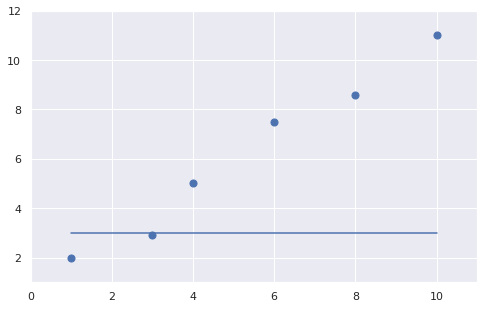

Cost after 2 iterations: 25.380436409999994


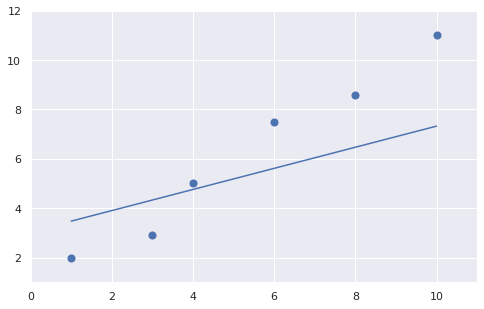

Cost after 4 iterations: 0.06009065985845279


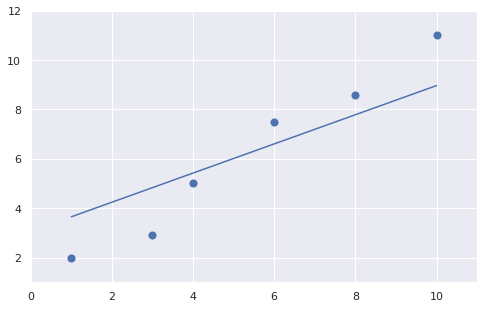

Cost after 6 iterations: 5.007503844147921


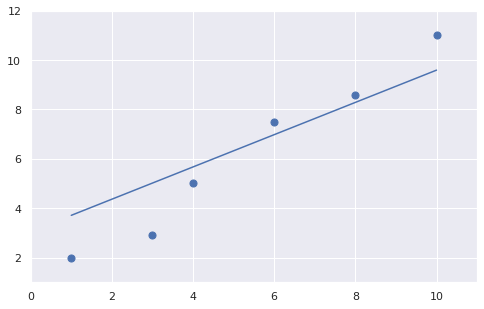

Cost after 8 iterations: 8.89779044567252


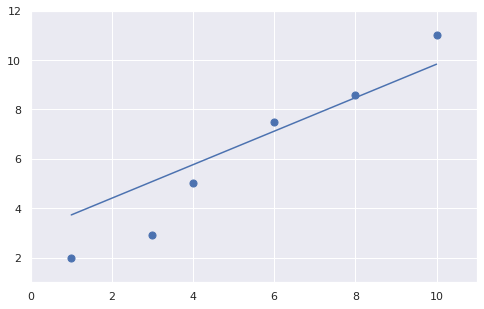

Cost after 10 iterations: 10.59631448984333


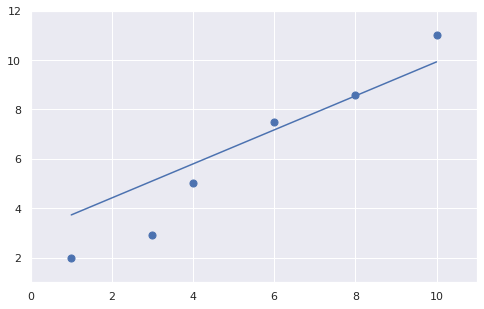

Cost after 12 iterations: 11.210733554519427


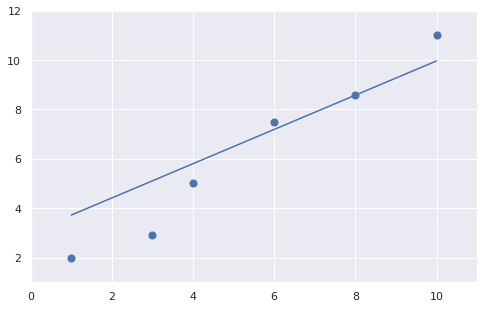

Cost after 14 iterations: 11.379719816113258


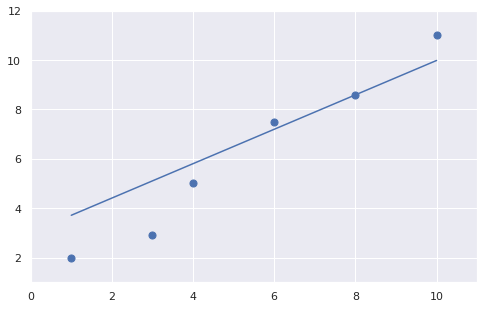

Cost after 16 iterations: 11.375974086267988


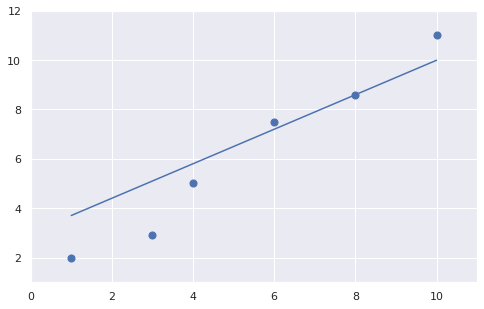

Cost after 18 iterations: 11.30694353486148


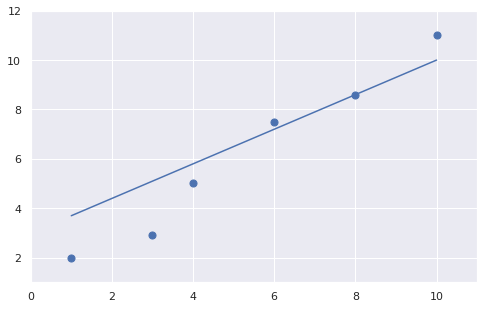

Cost after 20 iterations: 11.213818338414479


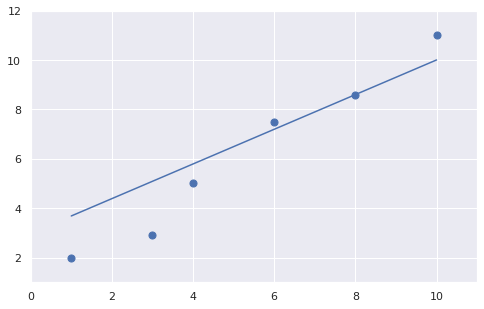

In [ ]:
x = np.array([1, 3, 4, 6, 8, 10])
y = np.array([2, 2.9, 5, 7.5, 8.6, 11])

costs, (m ,c) = linear_regression(x, y, 20, 0.01, 2)

## Multivariate Linear Regression

#### For n input features - $ x_1, x_2 ... x_n$

#### $$ y = \beta_0 + \beta_1x_1 + \beta_2x_2  .  .  .  \beta_nx_n $$

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [ ]:
b_data = load_boston()
print(b_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(b_data.data, b_data.target, test_size = 0.2, random_state = 9)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.7660111574904017

In [ ]:
print('Coefficients: ' + str(lin_reg.coef_))
print()
print('Intercept: ' + str(lin_reg.intercept_))

Coefficients: [-1.13857949e-01  4.26244079e-02  3.24416726e-02  2.02422869e+00
 -1.48729064e+01  3.94626653e+00 -3.73513877e-04 -1.36065848e+00
  2.80024959e-01 -1.22345482e-02 -8.74200433e-01  8.19816141e-03
 -5.24173305e-01]

Intercept: 32.72612668297055


## Polynomial Regression

#### $ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 $

#### $$ y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 +  \beta_3x_1^3 $$

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

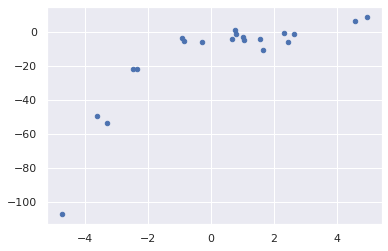

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x, y, s=20)
plt.show()

x = x.reshape(20,1)
y = y.reshape(20,1)

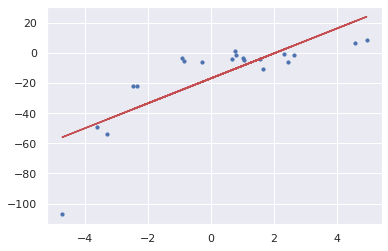

In [ ]:
lin_model = LinearRegression()

lin_model.fit(x, y)
y_pred = lin_model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

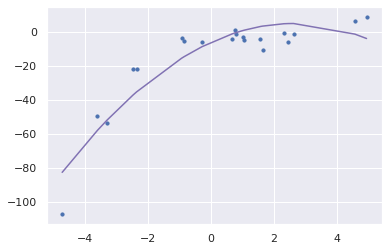

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x.reshape(20,1)
y = y.reshape(20,1)

polynomial_features = PolynomialFeatures(degree = 2) # 2, 3, 18
x_poly = polynomial_features.fit_transform(x)

poly_model1 = LinearRegression()

poly_model1.fit(x_poly, y)
y_pred = poly_model1.predict(x_poly)

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.show()

## Regularization

- #### Keep all the features but reduce magnitude/value of the parameters
- #### Works well when we have a lot of features, each of which contributes a bit to predicting y

#### We are going to discuss about two types of Regularization today -

- #### L1 Regularization

- #### L2 Regularization



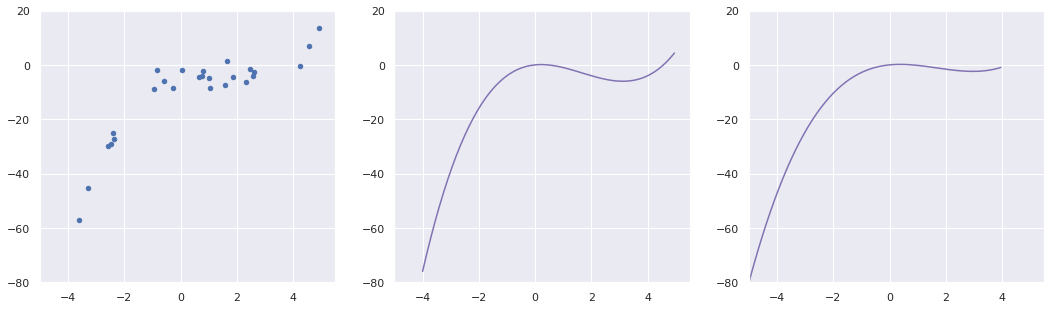

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 30)

plt.figure(figsize = (18,5))
plt.subplot(131)
plt.axis([-5,5.5,-80,20])
plt.scatter(x, y, s=20)

plt.subplot(132)
plt.axis([-5,5.5,-80,20])
x = np.arange(-4, 5, 0.05)
y = x - 2.5 * (x ** 2) + 0.5 * (x ** 3)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y), key=sort_axis)
x, y = zip(*sorted_zip)
plt.plot(x, y, color='m')

plt.subplot(133)
plt.axis([-5,5.5,-80,20])
x = np.arange(-6, 4, 0.05)
y = x - 1.5*(x ** 2) + 0.3 * (x ** 3)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y), key=sort_axis)
x, y = zip(*sorted_zip)
plt.plot(x, y, color='m')

plt.show()



### Ridge Regression

Linear Regression with L2 Regularization

We are going to modify our Cost function as follows -

$$ J = \frac{1}{2n} \cdot \Bigg\{\sum_{i = 1}^{n} (y' - y)^2 + \lambda \sum_{i = 1}^{j} \beta_j^2 \Bigg\}  $$

### Lasso

Linear Regression with L1 Regularization

We are going to modify our Cost function as follows -

$$ J = \frac{1}{2n} \cdot \Bigg\{\sum_{i = 1}^{n} (y' - y)^2 + \lambda \sum_{i = 1}^{j} |\beta_j| \Bigg\}  $$

### Elastic net

It is just a combination of Lasso and Ridge Regression

Cost function - 

$$ J = \frac{1}{2n} \cdot \Bigg\{\sum_{i = 1}^{n} (y' - y)^2 + \lambda_1 \sum_{i = 1}^{j} \beta_j^2 + \lambda_2 \sum_{i = 1}^{j} |\beta_j| \Bigg\} $$

### Ridge Regression in action

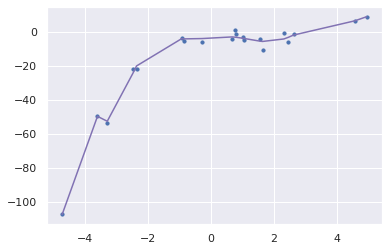

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x.reshape(20,1)
y = y.reshape(20,1)

polynomial_features = PolynomialFeatures(degree = 10) # 2, 3, 18
x_poly = polynomial_features.fit_transform(x)

poly_model = Ridge(alpha = 1) # 1, 1000 , 10e9

poly_model.fit(x_poly, y)
y_pred = poly_model.predict(x_poly)

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.show()